In [19]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from PIL import Image
import random
import math
import matplotlib.pyplot as plt

In [20]:
training_data = np.load('./output/training_data.npy')
training_labels = np.load('./output/training_dists.npy')

#pad the training data matrix so it is 100x1024

#(500, 100, 1000, 1)

# zero_padding_array = np.zeros((500,100,600,1))

In [21]:
BRANCH_NUM = 100
SEQUENCE_LEN = 1000

OUTPUT_DIST_NUM = int((BRANCH_NUM + 1) * BRANCH_NUM / 2)

In [22]:
training_data.shape

(500, 100, 1000, 1)

In [23]:
training_labels.shape

(500, 5050)

In [24]:
# zero_padding_array.shape

In [25]:
# print(training_data.shape)
# training_data = np.concatenate([training_data, zero_padding_array], axis=2)
print(training_data.shape)

print(training_labels.shape)

samples_count = training_data.shape[0]

train_size = math.floor(0.85*training_data.shape[0])

shuffle_indices = random.sample(range(0, samples_count), samples_count)

indices_train = shuffle_indices[0:train_size]
indices_test = shuffle_indices[train_size:samples_count]

X_train = training_data[indices_train,:]
Y_train = training_labels[indices_train]

X_test = training_data[indices_test,:]
Y_test = training_labels[indices_test]

print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)

print('Y_train.shape : ', Y_train.shape)
print('Y_test.shape : ', Y_test.shape)

np.save('./output/X_test.npy', X_test)
np.save('./output/Y_test.npy', Y_test)


(500, 100, 1000, 1)
(500, 5050)
X_train.shape :  (425, 100, 1000, 1)
X_test.shape :  (75, 100, 1000, 1)
Y_train.shape :  (425, 5050)
Y_test.shape :  (75, 5050)


In [26]:
model = Sequential()

# Layer 1
model.add(Conv2D(1024, input_shape=X_train.shape[1:], kernel_size=(4,1), strides=(1,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(AveragePooling2D(pool_size=(1, 1)))

# Layer 2
model.add(Conv2D(1024, (4,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(AveragePooling2D(pool_size=(1, 4)))

# Layer 3
model.add(Conv2D(128, (4,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(AveragePooling2D(pool_size=(1, 4)))


# Layer 4
model.add(Conv2D(128, (4,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(AveragePooling2D(pool_size=(1, 2)))

# Layer 5
model.add(Conv2D(128, (4,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(AveragePooling2D(pool_size=(1, 2)))

# Layer 6
model.add(Conv2D(128, (4,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(AveragePooling2D(pool_size=(1, 2)))

# Layer 7
model.add(Conv2D(128, (4,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(AveragePooling2D(pool_size=(1, 2)))

# Layer 8
model.add(Conv2D(128, (4,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(AveragePooling2D(pool_size=(1, 2)))

# Layer 8
model.add(Conv2D(128, (4,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(AveragePooling2D(pool_size=(1, 1)))

# Layer 10
model.add(Conv2D(128, (4,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(AveragePooling2D(pool_size=(1, 1)))


# Layer 5
model.add(Flatten())
model.add(Dense(OUTPUT_DIST_NUM, activation='relu'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 97, 1000, 1024)    5120      
_________________________________________________________________
batch_normalization_1 (Batch (None, 97, 1000, 1024)    4096      
_________________________________________________________________
activation_1 (Activation)    (None, 97, 1000, 1024)    0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 97, 1000, 1024)    0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 97, 1000, 1024)    0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 1000, 1024)    4195328   
_________________________________________________________________
batch_normalization_2 (Batch (None, 94, 1000, 1024)   

In [28]:
# (4) Compile 
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [29]:
# (5) Train
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=20, epochs=10, verbose=1)

model.save('./output/CNN_model_03.h5')

Train on 425 samples, validate on 75 samples
Epoch 1/10
425/425 [==============================] - 3676s 9s/step - loss: 0.3515 - accuracy: 0.0000e+00 - val_loss: 0.2401 - val_accuracy: 0.0000e+00
Epoch 2/10
425/425 [==============================] - 3519s 8s/step - loss: 0.3314 - accuracy: 0.0024 - val_loss: 0.2362 - val_accuracy: 0.0000e+00
Epoch 3/10
425/425 [==============================] - 3753s 9s/step - loss: 0.3279 - accuracy: 0.0000e+00 - val_loss: 0.2502 - val_accuracy: 0.0000e+00
Epoch 4/10
425/425 [==============================] - 3774s 9s/step - loss: 0.3254 - accuracy: 0.0000e+00 - val_loss: 0.2497 - val_accuracy: 0.0000e+00
Epoch 5/10
425/425 [==============================] - 3271s 8s/step - loss: 0.3254 - accuracy: 0.0000e+00 - val_loss: 0.2497 - val_accuracy: 0.0000e+00
Epoch 6/10
425/425 [==============================] - 3560s 8s/step - loss: 0.3211 - accuracy: 0.0024 - val_loss: 0.2491 - val_accuracy: 0.0000e+00
Epoch 7/10
425/425 [==============================]

## Load Model

In [30]:
model = keras.models.load_model('./output/CNN_model_03.h5')

In [31]:
train_result = model.evaluate(X_train, Y_train)
test_result = model.evaluate(X_test, Y_test)
print("Train Acc: ", train_result)
print("Test Acc: ", test_result)

75/75 [==============================] - 456s 6s/step
Train Acc:  [0.3494683666089002, 0.0]
Test Acc:  [0.2501508371035258, 0.0]


## X_train plot

In [32]:
X_train_results = model.predict(X_train)

In [33]:
train_show_index = 0

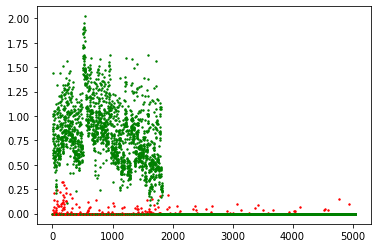

In [34]:
plt.scatter(range(X_train_results[train_show_index].shape[0]), X_train_results[train_show_index], c='r', s = 2)
plt.scatter(range(Y_train[train_show_index].shape[0]), Y_train[train_show_index], c='g', s = 2)

## X_test plot

In [35]:
X_test_results = model.predict(X_test)

In [36]:
test_show_index = 7

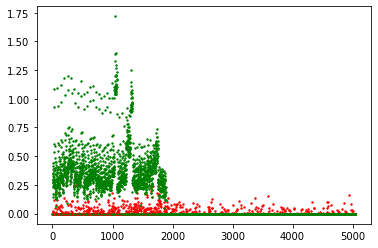

In [37]:
plt.scatter(range(X_test_results[test_show_index].shape[0]), X_test_results[test_show_index], c='r', s = 2)
plt.scatter(range(Y_test[test_show_index].shape[0]), Y_test[test_show_index], c='g', s = 2)

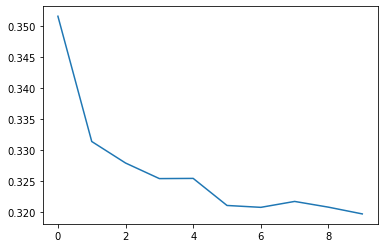

In [38]:
plt.plot(history.history['loss'])
plt.show()

In [56]:
import sys

In [57]:
np.set_printoptions(threshold=sys.maxsize)

In [58]:
X_train_results[0]

array([0.        , 0.7955968 , 0.        , 0.9414402 , 0.9297022 ,
       0.8366414 , 0.93198466, 1.065352  , 1.112599  , 1.2071095 ,
       1.0678215 , 1.2451812 , 1.0409416 , 1.0613962 , 1.1819015 ,
       1.2991618 , 1.12303   , 0.        , 1.0467211 , 1.0724049 ,
       1.1250511 , 0.        , 0.        , 0.        , 0.74582005,
       0.91157037, 0.        , 0.86273175, 0.9839026 , 0.81781495,
       0.78712535, 0.84686244, 0.80089676, 0.75219   , 0.        ,
       0.7962982 , 0.700342  , 0.7227066 , 0.9895178 , 0.94320124,
       1.0139866 , 0.98635685, 0.8608681 , 0.97418684, 0.9137981 ,
       0.7717389 , 0.7974529 , 0.        , 0.7799671 , 0.        ,
       0.80858207, 0.        , 0.9144175 , 0.8287535 , 0.9092705 ,
       0.7528588 , 0.73134774, 0.7186388 , 0.7384474 , 0.        ,
       0.7110593 , 0.65022516, 0.82126683, 0.        , 0.        ,
       0.        , 0.6616632 , 0.61300695, 0.6624189 , 0.7395168 ,
       0.6827172 , 0.7356973 , 0.8459237 , 0.77858955, 0.93149